# Explore here

# Paso 1: Planteamiento del problema y recopilación de datos

**Variable objetiva**: Precio del alojamiento

Para poder predecir el precio del alojamiento debemos primero obtener los datos:

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D
import math


def getData(URL:str) -> pd.DataFrame:
    raw_data = pd.read_csv(URL)
    return pd.DataFrame(raw_data)

URL = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
raw_data = getData(URL)

## Paso 2: Limpieza de datos

Ahora para poder hacer buenas predicciones debemos 'limpiar los datos'. Esto es, eliminar filas duplicadas, nulos y mantener solo los datos que necesitemos.

In [77]:
def cleanedData(df:pd.DataFrame) -> pd.DataFrame:
    df_ = df.copy()
    df_.drop('id', axis=1).duplicated() # No borra nada pero sería necesario en caso de que hubiera filas duplicadas
    df_.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)
    print(df_.head())
    return df_

cleaned_data = cleanedData(raw_data)

   host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2  

## Paso 3: Análisis de variable univariante

### Análisis de variables categóricas y numéricas
Para ello lo graficaremos con un histograma.

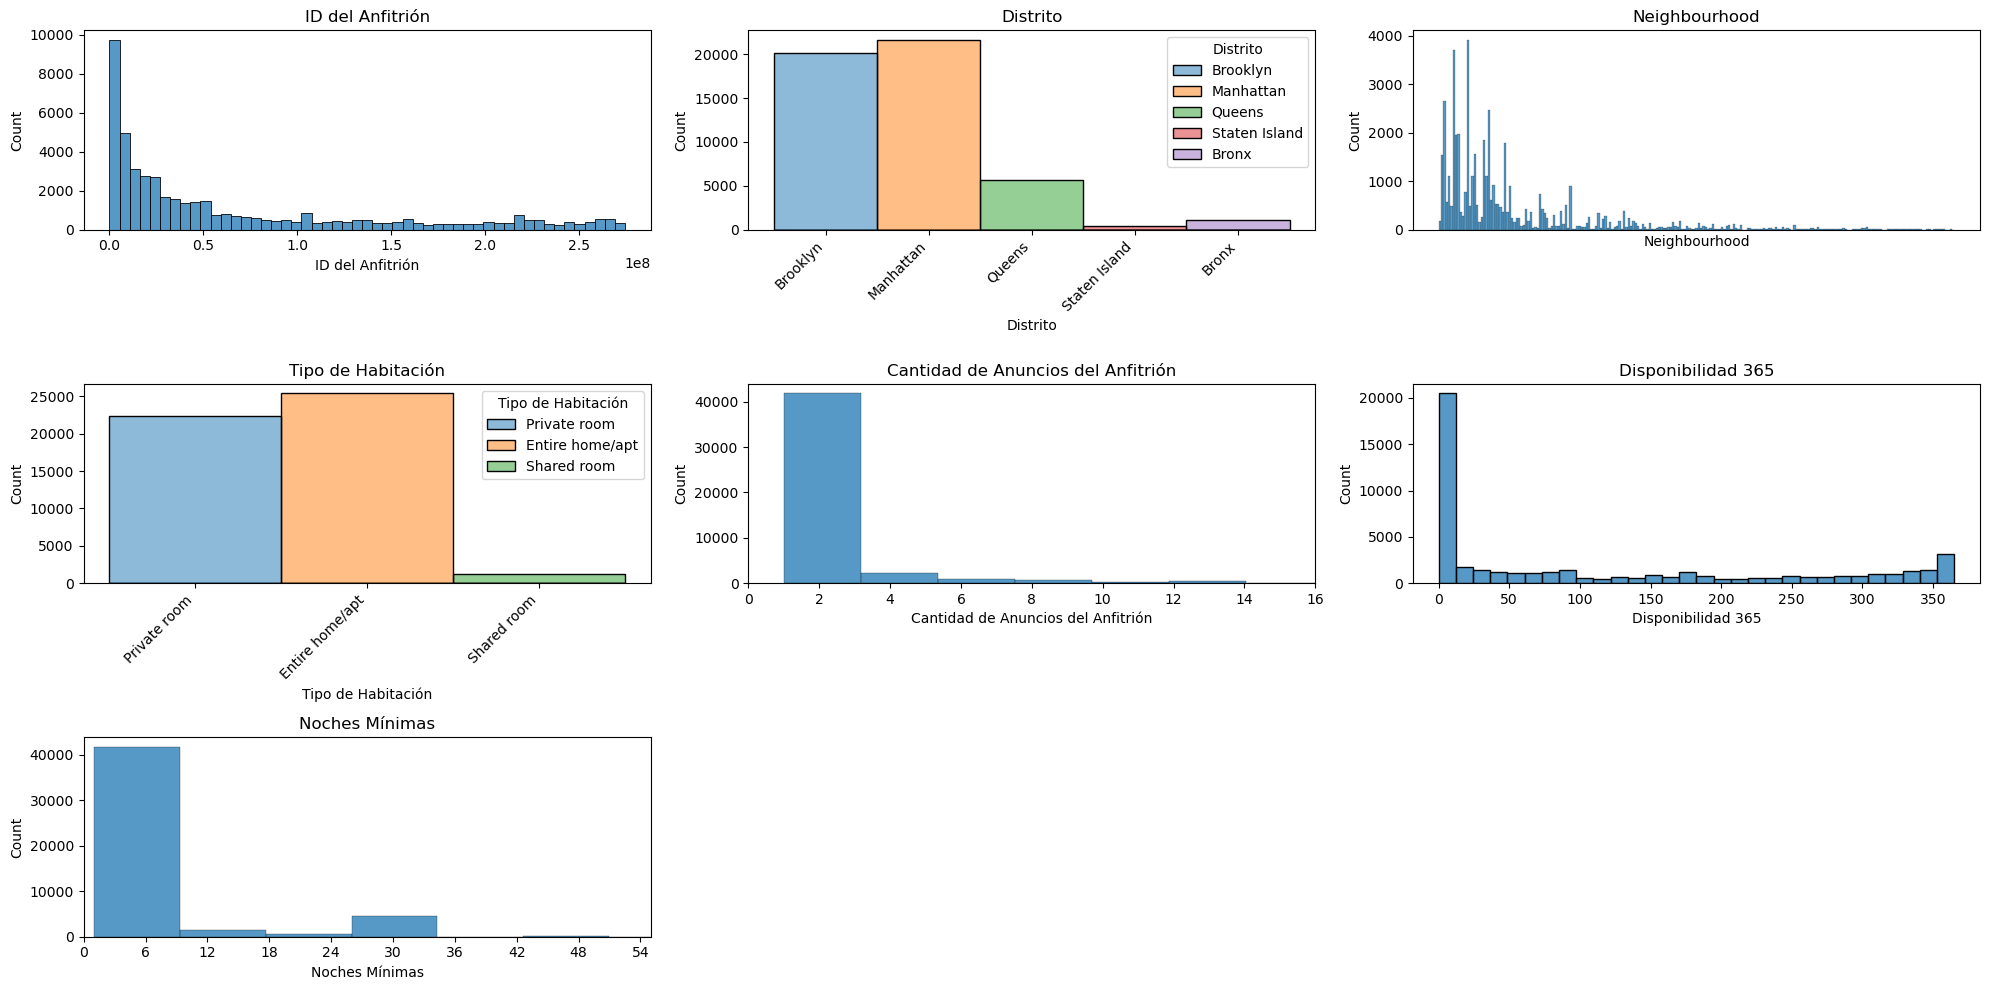

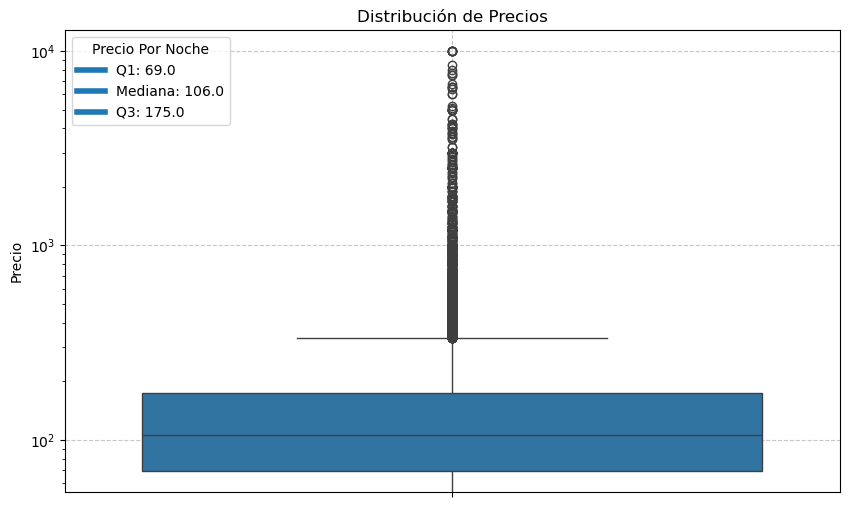

In [78]:
COLUMN_TRANSLATIONS = {
    'host_id': 'ID del Anfitrión',
    'neighbourhood_group': 'Distrito',
    'neighbourhood_group_encoded': 'Distrito_n',
    'neighbour': 'Barrio',
    'neighbourhood_encoded': 'Barrio_n',
    'latitude': 'Latitud',
    'longitude': 'Longitud',
    'room_type': 'Tipo de Habitación',
    'room_type_encoded': 'Tipo de Habitación_n',
    'price': 'Precio',
    'minimum_nights': 'Noches Mínimas',
    'number_of_reviews': 'Número de Reseñas',
    'reviews_per_month': 'Reseñas por Mes',
    'calculated_host_listings_count': 'Cantidad de Anuncios del Anfitrión',
    'availability_365': 'Disponibilidad 365'
}

def format_text(text: str) -> str:
    """
    Formatea el texto para que se traduzca, se presente sin barra baja y en formato de título, esto es, con cada palabra capitalizada
    """
    return COLUMN_TRANSLATIONS.get(text, text.replace('_', ' ').title())

def histplot(columns:list[str], cleaned_data:pd.DataFrame, axis_array):
    num_rows, num_cols = axis_array.shape

    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols

        if row < num_rows and col < num_cols:
            ax = axis_array[row,col]
            ax.set_title(format_text(column))

            if column in ['calculated_host_listings_count', 'minimum_nights']:
                # Esto es necesario para que se pueda ver de forma más razonables los histogramas. Lo que hacemos es cortar el número de valores del eje abscisas que vemos
                sns.histplot(ax=ax, data=cleaned_data, x=column, bins=150)
                if column == 'calculated_host_listings_count':
                    ax.set_xlim(0, 16)
                elif column == 'minimum_nights':
                    ax.set_xlim(0, 55)

                ax.xaxis.set_major_locator(MaxNLocator(integer=True))

            elif column in ['neighbourhood_group', 'room_type']:
                sns.histplot(ax=ax, data=cleaned_data, x=column, hue=column)
                if ax.legend_ is not None:
                    ax.legend_.set_title(format_text(column))
            else:
                sns.histplot(ax = ax, data = cleaned_data, x = column)

            if column == 'neighbourhood':
                ax.set_xticks([])
            if column in ['neighbourhood_group', 'room_type']:
                plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

            ax.set_xlabel(format_text(column))

def boxplot(cleaned_data:pd.DataFrame):
    plt.figure(figsize=(10,6))
    ax_price = sns.boxplot(data=cleaned_data, y='price')
    plt.title('Distribución de Precios')
    plt.ylabel('Precio')
    plt.grid(True, linestyle='--', alpha=0.7)
    ax_price.set_yscale('log')
    Q1 = cleaned_data['price'].quantile(0.25)
    Mediana = cleaned_data['price'].quantile(0.50)
    Q3 = cleaned_data['price'].quantile(0.75)
    legend_handles = [
        Line2D([0], [0], lw=4),
        Line2D([0], [0], lw=4),
        Line2D([0], [0], lw=4)
    ]

    labels = [
        f'Q1: {Q1}',
        f'Mediana: {Mediana}',
        f'Q3: {Q3}'
    ]

    ax_price.legend(handles=legend_handles, labels=labels,
                     loc='upper left', title="Precio por noche".title())
    plt.show()

# Histograma
histplot_variables = ['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'calculated_host_listings_count', 'availability_365', 'minimum_nights']
columns = 3
rows = len(histplot_variables) // 2
fig, axis = plt.subplots(rows, columns, figsize=(20, 10))
histplot(histplot_variables, cleaned_data, axis)
fig.delaxes(axis[2,1])
fig.delaxes(axis[2,2])
plt.tight_layout()
plt.show()

# Boxplot
boxplot(cleaned_data)


**NOTA:** Para representar mejor los datos del boxplot encontré en Internet una escala logarítmica en el eje de ordenadas (Y) que representa los datos de forma que 10 está a la misma distancia que 100 y 100 que 1000 por lo que comprime mejor los valores altos y 'descomprime' los valores bajos para hacer el boxplot más legible

### Análisis de Distribuciones:

#### Variables Categóricas:

- **Neightbourhood group (Distrito)**: La distribución geográfica de los alojamientos presenta una marca concentración de oferta en Brooklyn y Manhattan mientras que se aprecia marcadamente menor en Staten Island y el Bronx siendo, en particular, Staten Island un mercado prácticamente marginal.
- **Neighbourhood (Barrios)**: La distribución geográfica a nivel de barrios revela que hay una concentración significativa de alojamientos en determinados barrios frente al resto de estos.
- **Room type (Tipo de habitaciones)**: El análisis revela que la mayoría del alojamiento está dominado por habitaciones privadas o propiedades completas (casa o apartamento). Esto sugiere una marca preferencia del mercado hacia estas opciones.

#### Variables Numéricas:

- **Host ID (ID del Anfitrión)**: La mayoría de los host tienen un ID menor de 50M lo que podría revelar cierta luz en cómo son los anfitriones si conocemos cómo se forman los IDs de estos.
- **Calculated host listings count (Número de alojamientos diferentes de un mismo anfitrión)**: Los datos revelan que la mayoría de anfitriones no tienen más de 7 alojamientos y no se registran anfitriones con más de 14 alojamientos.
- **Availability_365 (Disponibilidad)**: La distribución de alojamientos presenta un patrón bimodal donde la gran mayoría de estos están disponibles con una disponibilidad muy limitada (menos de 10 días anuales) y otro donde la disponibilidad es practicamente o totalmente completa durante todo el año. Esto sugiere dos claras estrategias de negocio.
- **Minimum nights (Estancia mínima requerida)**: La mayoría de alojamientos establecen como requisito entre 1 y 25 noches mientras que puede verse que, en casos excepcionales, se requiere de más días llegando incluso hasta las 50 noches.


No consideré importante graficar individualmente latitude, longitude, number_of_reviews y reviews_per_month ya que no creo que podamos extraer información relevante para el menester de predecir el precio de un alojamiento.

**En resumen, se puede extraer que la mayoría del mercado se sitúa en Brooklyn y Manhattan donde el mercado prefiere alojamientos de habitaciones privadas o propiedades enteras con una disponibilidad o bien limitada o bien completa o casi completa donde se pide al consumidor una media de 13 noches de estancia como mínimo y cada noche tiene un precio de media de 106$.**

## Paso 4: Análisis de variables multivariante

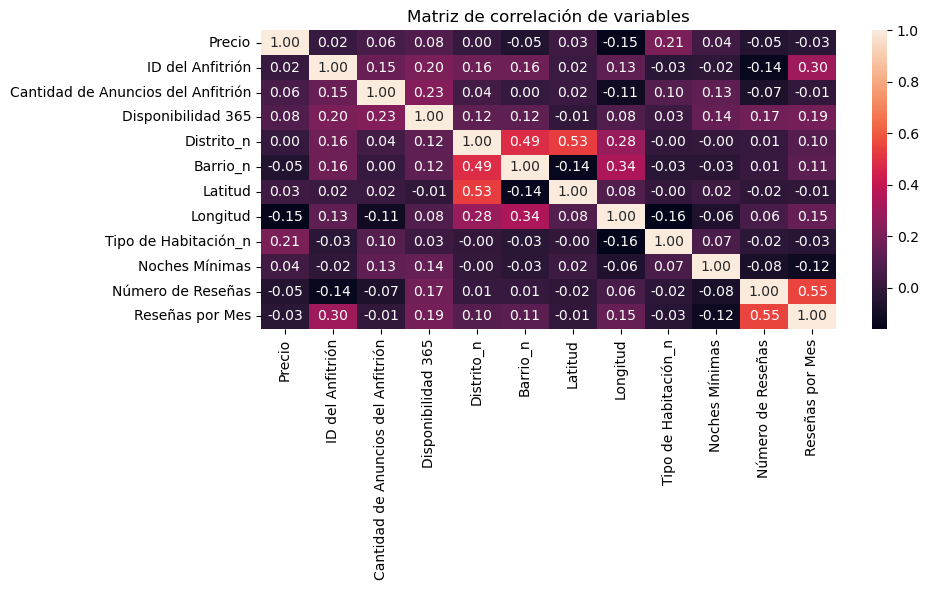

In [79]:
def general_multivariate(cleaned_data:pd.DataFrame):
    """
    Además de generar el gráfico de correlaciones retorna los datos del dataframe con los datos categóricos factorizados.
    """
    cleaned_data_heatmap = cleaned_data.copy()
    fig, axis = plt.subplots(figsize = (10, 6))
    cleaned_data_heatmap['neighbourhood_group_encoded'] = pd.factorize(cleaned_data_heatmap['neighbourhood_group'])[0]
    cleaned_data_heatmap['neighbourhood_encoded'] = pd.factorize(cleaned_data_heatmap['neighbourhood'])[0]
    cleaned_data_heatmap['room_type_encoded'] = pd.factorize(cleaned_data_heatmap['room_type'])[0]
    columns = ['price', 'host_id', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_encoded', 'neighbourhood_encoded', 'latitude', 'longitude', 'room_type_encoded', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
    formatted_labels = [format_text(column) for column in columns]
    sns.heatmap(cleaned_data_heatmap[columns].corr(), annot = True, fmt = ".2f", xticklabels=formatted_labels, yticklabels=formatted_labels)
    plt.title('Matriz de correlación de variables')
    plt.tight_layout()
    plt.show()
    return cleaned_data_heatmap

# Multivariante
factorized_data = general_multivariate(cleaned_data)

Conclusiones que podemos sacar sobre la variable objetivo:

1. El gráfico de correlaciones refleja que la variable que más afecta al precio del alojamiento es el tipo de habitación con una correlación positiva débil a moderada mientras que el resto de factores apenas influye en el precio o no influye en absoluto.

2. En el caso de la longitud hay una relación débil donde, al movernos hacia el este, los precios disminuyen ligeramente. Probablemente esto se deba al alejarnos del centro de la ciudad y del poder adquisitivo de los ciudadanos de esta zona de la ciudad.


Además creo que es importante hacer un gráfico adicional entre el precio y el tipo de habitación y el distrito para ver en detalle cómo afectan estos al precio. Para ello haremos uso de los boxplots.

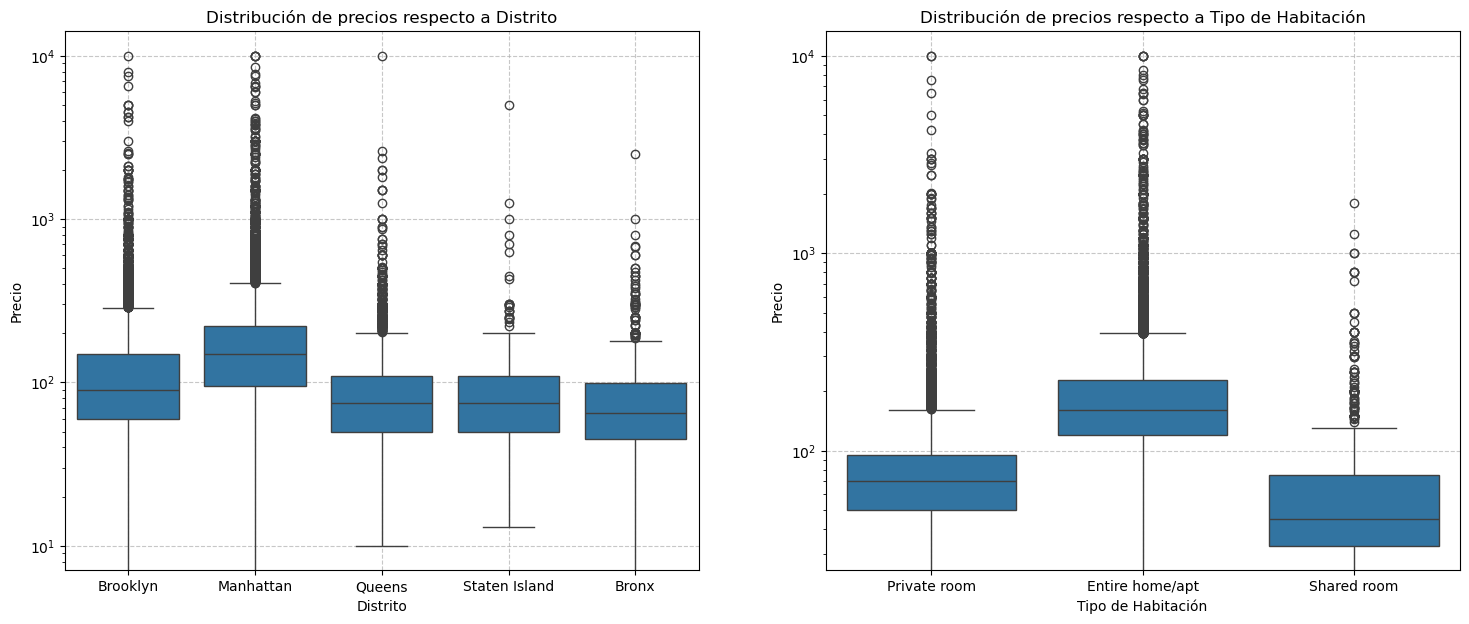

In [80]:
def boxplot_price_categorical(cleaned_data:pd.DataFrame):
    columns = ['neighbourhood_group', 'room_type']
    fig, axes = plt.subplots(1, len(columns), figsize=(18, 7))
    for i, column in enumerate(columns):
        ax = axes[i]
        sns.boxplot(ax=ax, data=cleaned_data, x=column, y='price')
        ax.set_title(f'Distribución de precios respecto a {format_text(column)}')
        ax.set_xlabel(format_text(column))
        ax.set_ylabel('Precio')
        ax.set_yscale('log')
        ax.grid(True, linestyle='--', alpha=0.7)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

boxplot_price_categorical(cleaned_data)

## Paso 5: Ingeniería de características

Ahora debemos manipular los valores de las variables para mejorar el rendimiento del modelo.
Para ello, el primer paso que vamos a hacer es hacer el **análisis de valores atípicos (outliers)**

## Paso 6: Análisis de valores atípicos (outliers)

Para realizar este análisis tenemos varios métodos que son: el análisis descriptivo y el uso de boxplots para cada variable.

### Análisis descriptivo

In [81]:
factorized_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,neighbourhood_encoded,room_type_encoded
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.786911,29.888782,0.567113
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.844386,34.676634,0.541249
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,7.500000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,19.000000,1.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,37.000000,1.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,4.000000,220.000000,2.000000


### Diagramas de cajas

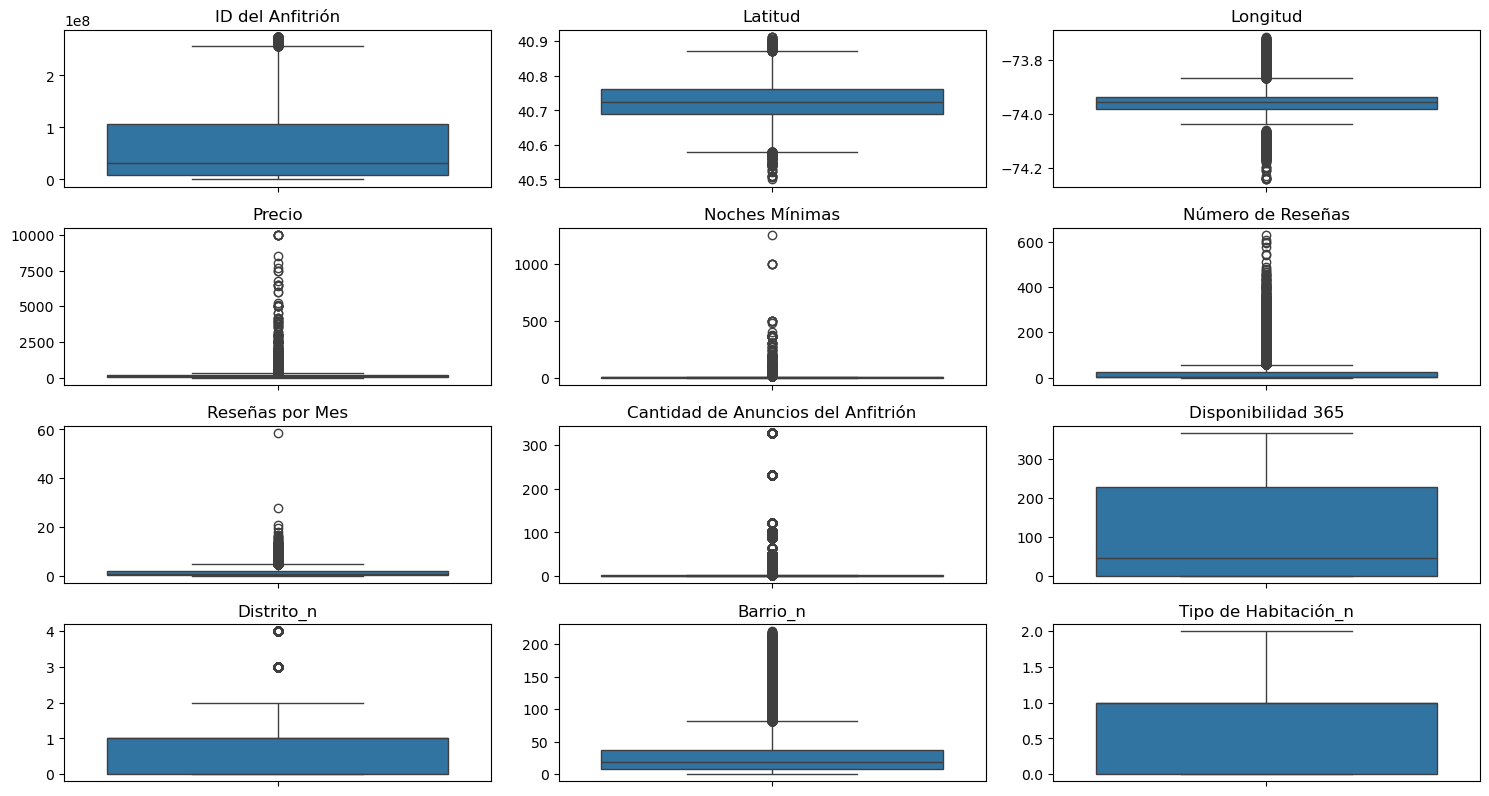

In [82]:
variables_length = len(factorized_data.columns)
columns = 3
rows = variables_length // columns

def boxplot_subplot(rows:int, columns:int, factorized_data:pd.DataFrame):
    fig, axis = plt.subplots(rows, columns, figsize=(15, 10))

    numerical_columns = factorized_data.select_dtypes(include=['int64', 'float64']).columns

    for i, column in enumerate(numerical_columns):
        row = i // columns
        col = i % columns

        if row < rows and col < columns:
            sns.boxplot(ax=axis[row, col], data=factorized_data, y=column)
            axis[row, col].set_title(format_text(column))
            axis[row, col].set_ylabel('')

    for i in range(len(numerical_columns), rows * columns):
        row = i // columns
        col = i % columns
        fig.delaxes(axis[row, col])

    plt.tight_layout()
    plt.show()

boxplot_subplot(rows, columns, factorized_data)

Ahora debemos obtener aquellas variables que hayan sido influidas notoriamente por los valores atípicos (outliers) que como podemos observar son: **precio, noches mínimas, número de reseñas, reseñas por mes y cantidad de anuncios del anfitrión**.

Ahora para saber qué hacer creo que puede ser una buena práctica volver a hacer el análisis descriptivo pero en este caso a las variables que hemos detectado que más han sido influidas por valores atípicos

In [83]:
outlier_variables = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']
factorized_data[outlier_variables].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982
std,240.154170,20.510550,44.550582,1.680442,32.952519
min,0.000000,1.000000,0.000000,0.010000,1.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000


A partir de aquí deberíamos guardar 2 dataframes, uno con valores atípicos y otro sin estos manteniendo únicamente los datos entre el Q1 y el Q3 y haciendo que los valores atípicos tome los valores atípicos altos su valor no atípico más alto y el valor atípico más bajo su valor no atípico más bajo.

In [84]:
def replace_outliers_from_column(column: str, df: pd.DataFrame) -> pd.DataFrame:
    df_copy = df.copy()

    column_stats = df_copy[column].describe()
    column_iqr = column_stats["75%"] - column_stats["25%"]
    upper_limit = column_stats["75%"] + 1.5 * column_iqr
    lower_limit = column_stats["25%"] - 1.5 * column_iqr

    if lower_limit < df_copy[column].min():
        lower_limit = df_copy[column].min()

    df_copy[column] = df_copy[column].apply(lambda x: x if pd.isna(x) else (
        upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x)
    ))
    print(f"Los límites superior e inferior para la búsqueda de outliers en '{column}' son {upper_limit:.2f} y {lower_limit:.2f}, con un rango intercuartílico de {column_iqr:.2f}")

    return df_copy


def process_outliers_in_dataframe(df_original: pd.DataFrame, columns_to_process: list[str]) -> pd.DataFrame:
    df_processed = df_original.copy()

    for column in columns_to_process:
        if column in df_processed.columns:
            df_processed = replace_outliers_from_column(column, df_processed)
    return df_processed


outlier_variables = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

total_data_without_outliers = process_outliers_in_dataframe(factorized_data, outlier_variables)

Los límites superior e inferior para la búsqueda de outliers en 'price' son 334.00 y 0.00, con un rango intercuartílico de 106.00
Los límites superior e inferior para la búsqueda de outliers en 'minimum_nights' son 11.00 y 1.00, con un rango intercuartílico de 4.00
Los límites superior e inferior para la búsqueda de outliers en 'number_of_reviews' son 58.50 y 0.00, con un rango intercuartílico de 23.00
Los límites superior e inferior para la búsqueda de outliers en 'reviews_per_month' son 4.77 y 0.01, con un rango intercuartílico de 1.83
Los límites superior e inferior para la búsqueda de outliers en 'calculated_host_listings_count' son 3.50 y 1.00, con un rango intercuartílico de 1.00


#### Estadísticas Descriptivas de las Columnas SIN Outliers


--- Estadísticas Descriptivas de las Columnas SIN Outliers ---
              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48895.000000     48895.00000        48895.00000       38843.000000   
mean     132.979753         3.82532           15.67419           1.297266   
std       83.530504         3.32072           20.34953           1.395207   
min        0.000000         1.00000            0.00000           0.010000   
25%       69.000000         1.00000            1.00000           0.190000   
50%      106.000000         3.00000            5.00000           0.720000   
75%      175.000000         5.00000           24.00000           2.020000   
max      334.000000        11.00000           58.50000           4.765000   

       calculated_host_listings_count  
count                    48895.000000  
mean                         1.614920  
std                          0.946883  
min                          1.000000  
25%                          1.000000  
50

#### Dataframe SIN Outliers

In [87]:
total_data_without_outliers

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,neighbourhood_encoded,room_type_encoded
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,3.5,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,1.0,365,1,2,0
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,58.5,4.64,1.0,194,0,3,1
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2.0,0.0,NaN,2.0,9,0,6,0
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4.0,0.0,NaN,2.0,36,0,21,0
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10.0,0.0,NaN,1.0,27,1,2,1
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1.0,0.0,NaN,3.5,2,1,7,2


#### Dataframe CON Outliers

In [ ]:
total_data_without_outliers